## Imbalanced

Imbalance data refers to a situation in which the classes within the dataset are not represented equally.

**Is a classification problem that affects the target variable.**


#### Loading and preparing the data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler

from sklearn.utils import resample

In [2]:
titanic = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/titanic_train.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


- Check for anomalies

In [3]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Upon checking the number of null values, we are going to drop the column **Cabin** and also dropping rows where **Age** is null.

In [4]:
titanic.drop(columns="Cabin", inplace = True)
titanic.dropna(inplace=True)

In [5]:
titanic.shape

(712, 11)

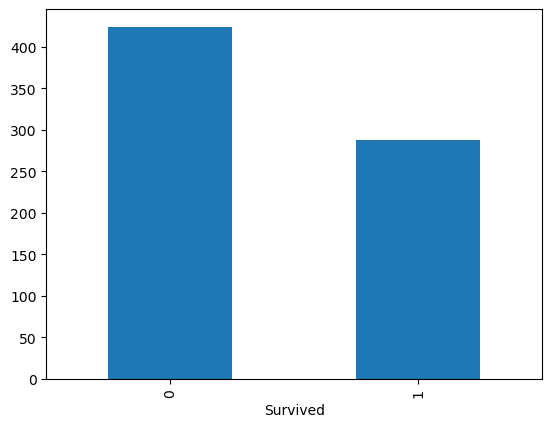

In [6]:
survived = titanic["Survived"].value_counts()
survived.plot(kind="bar")
plt.show()

- Preparing the data before modeling

In [7]:
titanic.drop(columns=["Name", "Ticket", "PassengerId"], inplace = True)

In [8]:
titanic["Sex"] = titanic["Sex"].replace({"male":0,
                                         "female":1})

C:\Users\manoe.MC_ASUS\AppData\Local\Temp\ipykernel_19076\1812906043.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic["Sex"] = titanic["Sex"].replace({"male":0,


In [9]:
titanic = pd.get_dummies(titanic, columns=["Embarked"], dtype=int)

In [10]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,1


For baseline, we will train a Logistic Regression in imbalanced data.

In [11]:
features = titanic.drop(columns = ["Survived"])
target = titanic["Survived"]

X_train, X_test, y_train, y_test = train_test_split(features, target)

In [12]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
log_reg = LogisticRegression()

In [14]:
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [15]:
log_reg.score(X_test_scaled, y_test)

0.8258426966292135

In [16]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       103
           1       0.81      0.77      0.79        75

    accuracy                           0.83       178
   macro avg       0.82      0.82      0.82       178
weighted avg       0.83      0.83      0.83       178



#### Oversampling

In [17]:
train = pd.DataFrame(X_train_scaled, columns = X_train.columns)


In [18]:
train["Survived"] = y_train.values
train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Survived
0,0.905581,-0.731083,0.031391,0.610031,-0.493394,-0.341206,-0.477060,-0.192076,0.532592,0
1,-1.494322,-0.731083,1.280775,0.610031,-0.493394,0.855478,2.096173,-0.192076,-1.877611,1
2,0.905581,1.367833,-0.801532,-0.541053,-0.493394,-0.505522,-0.477060,-0.192076,0.532592,0
3,-0.294370,-0.731083,-1.842686,0.610031,0.652138,-0.288901,-0.477060,-0.192076,0.532592,1
4,0.905581,-0.731083,-0.593302,-0.541053,-0.493394,-0.506346,-0.477060,5.206272,-1.877611,0
...,...,...,...,...,...,...,...,...,...,...
529,0.905581,-0.731083,-0.870943,-0.541053,-0.493394,-0.518352,-0.477060,-0.192076,0.532592,0
530,-0.294370,1.367833,-0.246250,0.610031,0.652138,-0.145802,-0.477060,-0.192076,0.532592,0
531,-1.494322,1.367833,-0.385071,-0.541053,-0.493394,0.708843,2.096173,-0.192076,-1.877611,1
532,0.905581,-0.731083,-0.385071,-0.541053,-0.493394,-0.505112,-0.477060,-0.192076,0.532592,0


In [19]:
survived = train[train["Survived"] == 1]
no_survived = train[train["Survived"] == 0]

In [20]:
display(survived)
display(no_survived)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Survived
1,-1.494322,-0.731083,1.280775,0.610031,-0.493394,0.855478,2.096173,-0.192076,-1.877611,1
3,-0.294370,-0.731083,-1.842686,0.610031,0.652138,-0.288901,-0.477060,-0.192076,0.532592,1
7,-1.494322,1.367833,-0.870943,0.610031,-0.493394,1.490457,2.096173,-0.192076,-1.877611,1
9,-1.494322,1.367833,-0.454481,2.912199,1.797671,4.532045,-0.477060,-0.192076,0.532592,1
10,0.905581,1.367833,0.239621,2.912199,-0.493394,-0.346140,-0.477060,-0.192076,0.532592,1
...,...,...,...,...,...,...,...,...,...,...
524,-0.294370,1.367833,-0.801532,-0.541053,1.797671,-0.402393,-0.477060,-0.192076,0.532592,1
525,0.905581,1.367833,-1.981507,-0.541053,1.797671,-0.348278,2.096173,-0.192076,-1.877611,1
526,-1.494322,-0.731083,0.725493,-0.541053,-0.493394,-0.047113,2.096173,-0.192076,-1.877611,1
531,-1.494322,1.367833,-0.385071,-0.541053,-0.493394,0.708843,2.096173,-0.192076,-1.877611,1


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Survived
0,0.905581,-0.731083,0.031391,0.610031,-0.493394,-0.341206,-0.477060,-0.192076,0.532592,0
2,0.905581,1.367833,-0.801532,-0.541053,-0.493394,-0.505522,-0.477060,-0.192076,0.532592,0
4,0.905581,-0.731083,-0.593302,-0.541053,-0.493394,-0.506346,-0.477060,5.206272,-1.877611,0
5,0.905581,-0.731083,0.725493,-0.541053,-0.493394,-0.516378,2.096173,-0.192076,-1.877611,0
6,0.905581,-0.731083,-1.495635,4.063283,0.652138,-0.084122,-0.477060,5.206272,-1.877611,0
...,...,...,...,...,...,...,...,...,...,...
527,-1.494322,-0.731083,2.391339,0.610031,4.088736,4.532045,-0.477060,-0.192076,0.532592,0
528,0.905581,-0.731083,-1.426225,4.063283,1.797671,-0.039465,-0.477060,-0.192076,0.532592,0
529,0.905581,-0.731083,-0.870943,-0.541053,-0.493394,-0.518352,-0.477060,-0.192076,0.532592,0
530,-0.294370,1.367833,-0.246250,0.610031,0.652138,-0.145802,-0.477060,-0.192076,0.532592,0


In [21]:
yes_survived_oversampled = resample(survived, 
                                    replace=True, 
                                    n_samples = len(no_survived),
                                    random_state=0)

In [22]:
yes_survived_oversampled

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Survived
422,0.905581,1.367833,-1.148584,-0.541053,-0.493394,-0.516295,2.096173,-0.192076,-1.877611,1
97,-1.494322,1.367833,0.586673,-0.541053,-0.493394,3.831848,2.096173,-0.192076,-1.877611,1
282,-0.294370,1.367833,-1.773276,1.761115,0.652138,0.110789,-0.477060,-0.192076,0.532592,1
476,-1.494322,1.367833,0.031391,-0.541053,-0.493394,1.186496,-0.477060,-0.192076,0.532592,1
143,-0.294370,1.367833,-0.870943,-0.541053,-0.493394,-0.451737,-0.477060,-0.192076,0.532592,1
...,...,...,...,...,...,...,...,...,...,...
71,-1.494322,-0.731083,-0.454481,-0.541053,0.652138,0.591567,2.096173,-0.192076,-1.877611,1
286,-0.294370,1.367833,0.031391,2.912199,-0.493394,-0.244491,-0.477060,-0.192076,0.532592,1
202,0.905581,-0.731083,0.170211,-0.541053,-0.493394,0.456116,-0.477060,-0.192076,0.532592,1
411,-1.494322,-0.731083,1.558416,-0.541053,-0.493394,-0.056982,-0.477060,-0.192076,0.532592,1


In [23]:
no_survived

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Survived
0,0.905581,-0.731083,0.031391,0.610031,-0.493394,-0.341206,-0.477060,-0.192076,0.532592,0
2,0.905581,1.367833,-0.801532,-0.541053,-0.493394,-0.505522,-0.477060,-0.192076,0.532592,0
4,0.905581,-0.731083,-0.593302,-0.541053,-0.493394,-0.506346,-0.477060,5.206272,-1.877611,0
5,0.905581,-0.731083,0.725493,-0.541053,-0.493394,-0.516378,2.096173,-0.192076,-1.877611,0
6,0.905581,-0.731083,-1.495635,4.063283,0.652138,-0.084122,-0.477060,5.206272,-1.877611,0
...,...,...,...,...,...,...,...,...,...,...
527,-1.494322,-0.731083,2.391339,0.610031,4.088736,4.532045,-0.477060,-0.192076,0.532592,0
528,0.905581,-0.731083,-1.426225,4.063283,1.797671,-0.039465,-0.477060,-0.192076,0.532592,0
529,0.905581,-0.731083,-0.870943,-0.541053,-0.493394,-0.518352,-0.477060,-0.192076,0.532592,0
530,-0.294370,1.367833,-0.246250,0.610031,0.652138,-0.145802,-0.477060,-0.192076,0.532592,0


In [24]:
train_over = pd.concat([yes_survived_oversampled, no_survived])
train_over

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Survived
422,0.905581,1.367833,-1.148584,-0.541053,-0.493394,-0.516295,2.096173,-0.192076,-1.877611,1
97,-1.494322,1.367833,0.586673,-0.541053,-0.493394,3.831848,2.096173,-0.192076,-1.877611,1
282,-0.294370,1.367833,-1.773276,1.761115,0.652138,0.110789,-0.477060,-0.192076,0.532592,1
476,-1.494322,1.367833,0.031391,-0.541053,-0.493394,1.186496,-0.477060,-0.192076,0.532592,1
143,-0.294370,1.367833,-0.870943,-0.541053,-0.493394,-0.451737,-0.477060,-0.192076,0.532592,1
...,...,...,...,...,...,...,...,...,...,...
527,-1.494322,-0.731083,2.391339,0.610031,4.088736,4.532045,-0.477060,-0.192076,0.532592,0
528,0.905581,-0.731083,-1.426225,4.063283,1.797671,-0.039465,-0.477060,-0.192076,0.532592,0
529,0.905581,-0.731083,-0.870943,-0.541053,-0.493394,-0.518352,-0.477060,-0.192076,0.532592,0
530,-0.294370,1.367833,-0.246250,0.610031,0.652138,-0.145802,-0.477060,-0.192076,0.532592,0


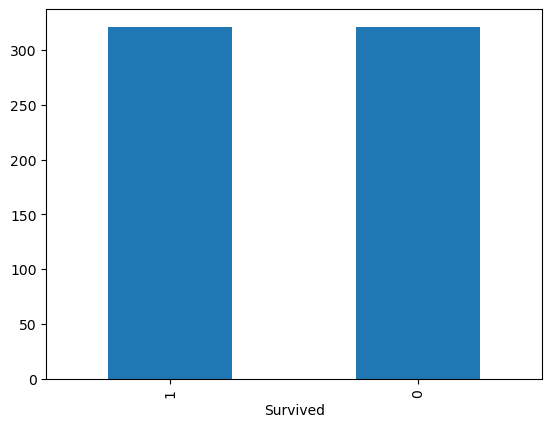

In [25]:
survived_plt = train_over["Survived"].value_counts()
survived_plt.plot(kind="bar")
plt.show()

- Now, with balanced data, we will create a new instance of Logistic Regression.

In [26]:
X_train_over = train_over.drop(columns = ["Survived"])
y_train_over = train_over["Survived"]

In [27]:
log_reg = LogisticRegression()
log_reg.fit(X_train_over, y_train_over)

LogisticRegression()

In [28]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       103
           1       0.76      0.80      0.78        75

    accuracy                           0.81       178
   macro avg       0.80      0.81      0.81       178
weighted avg       0.81      0.81      0.81       178



c:\Users\manoe.MC_ASUS\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


#### Undersampling

Undersampling involves removing data points from the majority class to align its size with that of the minority class

In [29]:
train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Survived
0,0.905581,-0.731083,0.031391,0.610031,-0.493394,-0.341206,-0.477060,-0.192076,0.532592,0
1,-1.494322,-0.731083,1.280775,0.610031,-0.493394,0.855478,2.096173,-0.192076,-1.877611,1
2,0.905581,1.367833,-0.801532,-0.541053,-0.493394,-0.505522,-0.477060,-0.192076,0.532592,0
3,-0.294370,-0.731083,-1.842686,0.610031,0.652138,-0.288901,-0.477060,-0.192076,0.532592,1
4,0.905581,-0.731083,-0.593302,-0.541053,-0.493394,-0.506346,-0.477060,5.206272,-1.877611,0
...,...,...,...,...,...,...,...,...,...,...
529,0.905581,-0.731083,-0.870943,-0.541053,-0.493394,-0.518352,-0.477060,-0.192076,0.532592,0
530,-0.294370,1.367833,-0.246250,0.610031,0.652138,-0.145802,-0.477060,-0.192076,0.532592,0
531,-1.494322,1.367833,-0.385071,-0.541053,-0.493394,0.708843,2.096173,-0.192076,-1.877611,1
532,0.905581,-0.731083,-0.385071,-0.541053,-0.493394,-0.505112,-0.477060,-0.192076,0.532592,0


In [30]:
no_survived_undersampled = resample(no_survived, 
                                    replace=False, 
                                    n_samples = len(survived),
                                    random_state=0)
no_survived_undersampled

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Survived
312,-1.494322,-0.731083,-0.038020,-0.541053,-0.493394,-0.066851,-0.477060,-0.192076,0.532592,0
438,0.905581,-0.731083,-0.107430,-0.541053,-0.493394,-0.503138,-0.477060,-0.192076,0.532592,0
34,-1.494322,-0.731083,2.252519,-0.541053,-0.493394,-0.134946,-0.477060,-0.192076,0.532592,0
123,-0.294370,-0.731083,-0.385071,-0.541053,-0.493394,-0.451737,-0.477060,-0.192076,0.532592,0
369,0.905581,-0.731083,-0.593302,-0.541053,-0.493394,-0.505522,-0.477060,-0.192076,0.532592,0
...,...,...,...,...,...,...,...,...,...,...
442,-1.494322,-0.731083,1.836057,-0.541053,-0.493394,-0.053117,2.096173,-0.192076,-1.877611,0
230,0.905581,1.367833,-0.107430,0.610031,0.652138,-0.374760,-0.477060,-0.192076,0.532592,0
321,0.905581,-0.731083,-0.107430,-0.541053,-0.493394,0.456116,-0.477060,-0.192076,0.532592,0
418,0.905581,-0.731083,-0.732122,-0.541053,-0.493394,-0.372786,-0.477060,-0.192076,0.532592,0


In [31]:
train_under = pd.concat([no_survived_undersampled, survived])
train_under

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Survived
312,-1.494322,-0.731083,-0.038020,-0.541053,-0.493394,-0.066851,-0.477060,-0.192076,0.532592,0
438,0.905581,-0.731083,-0.107430,-0.541053,-0.493394,-0.503138,-0.477060,-0.192076,0.532592,0
34,-1.494322,-0.731083,2.252519,-0.541053,-0.493394,-0.134946,-0.477060,-0.192076,0.532592,0
123,-0.294370,-0.731083,-0.385071,-0.541053,-0.493394,-0.451737,-0.477060,-0.192076,0.532592,0
369,0.905581,-0.731083,-0.593302,-0.541053,-0.493394,-0.505522,-0.477060,-0.192076,0.532592,0
...,...,...,...,...,...,...,...,...,...,...
524,-0.294370,1.367833,-0.801532,-0.541053,1.797671,-0.402393,-0.477060,-0.192076,0.532592,1
525,0.905581,1.367833,-1.981507,-0.541053,1.797671,-0.348278,2.096173,-0.192076,-1.877611,1
526,-1.494322,-0.731083,0.725493,-0.541053,-0.493394,-0.047113,2.096173,-0.192076,-1.877611,1
531,-1.494322,1.367833,-0.385071,-0.541053,-0.493394,0.708843,2.096173,-0.192076,-1.877611,1


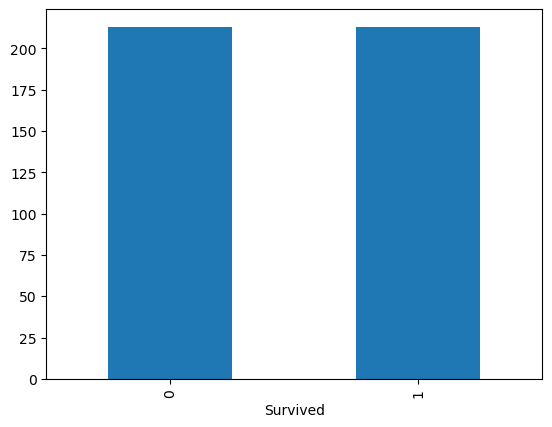

In [32]:
survived_plt = train_under["Survived"].value_counts()
survived_plt.plot(kind="bar")
plt.show()

Now, we have the same amount of observations for both survived and not_survived. Let's see how it can impact our model 

- Separating our features from our target

In [33]:
X_train_under = train_under.drop(columns = ["Survived"])
y_train_under = train_under["Survived"]

- Model training

In [34]:
log_reg = LogisticRegression()
log_reg.fit(X_train_under, y_train_under)

LogisticRegression()

- Evaluate our model

In [35]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

           0       0.86      0.76      0.80       103
           1       0.71      0.83      0.77        75

    accuracy                           0.79       178
   macro avg       0.78      0.79      0.78       178
weighted avg       0.80      0.79      0.79       178



c:\Users\manoe.MC_ASUS\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


#### SMOTE

SMOTE utilizes KNN approach to generate synthetic samples for the minority class.

SMOTE comes from a different package - **imblearn**

In [36]:
from imblearn.over_sampling import SMOTE

Now, we need to create a SMOTE object in order to balance our data

- **sampling_strategy** - corresponds to the ratio of the number of samples in the minority class over the number of samples in the majority class.

In [37]:
sm = SMOTE(random_state = 1,sampling_strategy=1.0)

In [38]:
X_train_sm,y_train_sm = sm.fit_resample(X_train_scaled,y_train)

In [39]:
y_train_sm.value_counts()

Survived
0    321
1    321
Name: count, dtype: int64

- Now lets train our model, to see if get any improvements.

In [40]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_sm, y_train_sm)

LogisticRegression(max_iter=1000)

- Evaluate our model

In [41]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83       103
           1       0.75      0.81      0.78        75

    accuracy                           0.81       178
   macro avg       0.80      0.81      0.81       178
weighted avg       0.81      0.81      0.81       178



In [ ]:
adjusted_pred = [1 if tup[1] > 0.30 else 0 for tup in log_reg.predict_proba(X_test_scaled)]

In [43]:
print(classification_report(y_pred = adjusted_pred, y_true = y_test))

              precision    recall  f1-score   support

           0       0.86      0.58      0.69       103
           1       0.60      0.87      0.71        75

    accuracy                           0.70       178
   macro avg       0.73      0.72      0.70       178
weighted avg       0.75      0.70      0.70       178



In [44]:
kaggle = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/sales.csv")

In [45]:
kaggle

,True_index,Store_ID,Day_of_week,Date,Nb_customers_on_day,Open,Promotion,State_holiday,School_holiday,Sales
0,0,625,3,2013-11-06,641,1,1,0,0,7293
1,1,293,2,2013-07-16,877,1,1,0,1,7060
2,2,39,4,2014-01-23,561,1,1,0,0,4565
3,3,676,4,2013-09-26,1584,1,1,0,0,6380
4,4,709,3,2014-01-22,1477,1,1,0,0,11647
...,...,...,...,...,...,...,...,...,...,...
640835,712040,674,6,2014-09-20,611,1,0,0,0,4702
640836,712041,1014,4,2015-01-15,1267,1,1,0,0,12545
640837,712042,135,6,2015-06-20,595,1,0,0,0,5823
640838,712043,810,1,2014-08-18,599,1,1,0,1,7986
